<a href="https://colab.research.google.com/github/maddog19527/CS-660-Homeworks/blob/main/Homework_6_CSS_660.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import sympy as smp
from sympy import *
import scipy as sp
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

Step 1-Create a NetworkX Graph based upon flight data

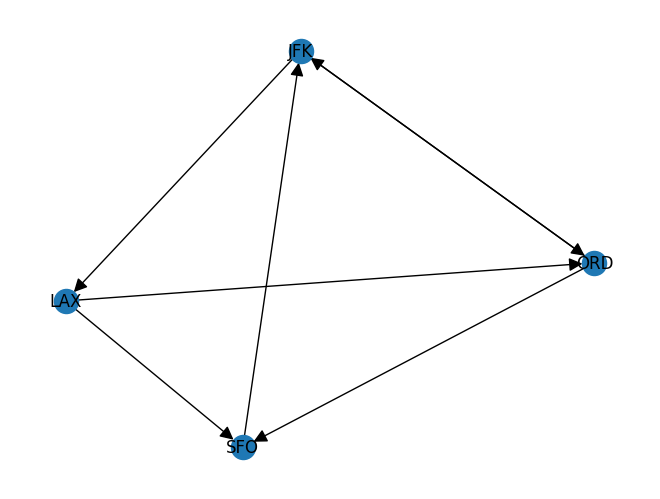

In [3]:
Flights=nx.DiGraph()
Flights.add_nodes_from(['LAX','SFO','ORD','JFK'])
Labels={1:'LAX',2:'SFO',3:'ORD',4:'JFK'}
Flights.add_edges_from([('LAX','SFO'),('LAX','ORD'),('JFK','LAX'),('JFK','ORD'),('ORD','JFK'),('ORD','SFO'),('SFO','JFK')])
pos=nx.spring_layout(Flights)
nx.draw(Flights, pos, with_labels=True,arrows=True, arrowsize=20)
plt.show()

Step 2-Use nx.pagerank to calculate pagerank

In [4]:
#Use nx.pagerank to calculate pagerank
pagerank=nx.pagerank(Flights, alpha=0.85)

print('Pagerank result:', pagerank)

Pagerank result: {'LAX': 0.18089419579926044, 'SFO': 0.22393415947423123, 'ORD': 0.25777436013130706, 'JFK': 0.33739728459520135}


Step 3-Rebuild Flights Graph with weights from Pagerank-Using a heatmap for nodes to determine larger vs smaller weights

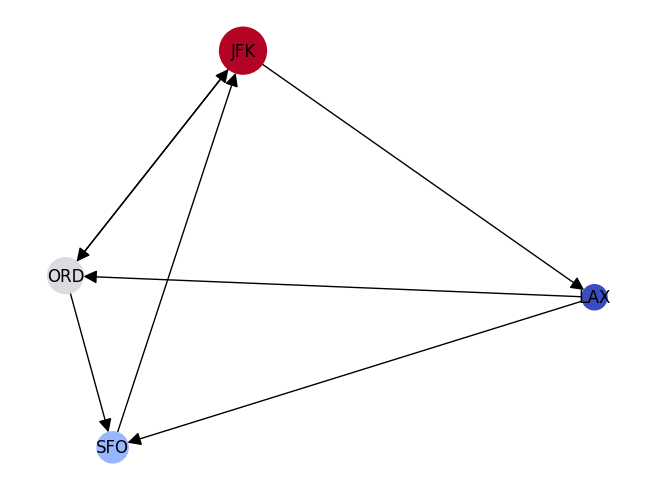

In [17]:
Flights2=nx.DiGraph()

Flights2.add_edges_from([('LAX','SFO'),('LAX','ORD'),('JFK','LAX'),('JFK','ORD'),('ORD','JFK'),('ORD','SFO'),('SFO','JFK')])
pagerank=nx.pagerank(Flights2, alpha=0.85)

node_sizes=[10000*(pagerank[node]**2) for node in Flights2.nodes()]
normalize=mcolors.Normalize(vmin=min(pagerank.values()), vmax=max(pagerank.values()))
cmap=plt.colormaps['coolwarm']
node_color=[cmap(normalize(pagerank[node])) for node in Flights2.nodes()]
pos=nx.spring_layout(Flights)
nx.draw(Flights, pos, with_labels=True, node_size=node_sizes, node_color=node_color, arrows=True, arrowsize=20)
plt.show()